# 시작하기 앞서, Trouble Shooting  안내
### Q. 만약 잘 되던 코드가, 아래와 같은 에러메세지와 함께 동작이 안된다면?
```
AttributeError: module 'triton.backends' has no attribute 'compiler'
```

### A. 런타임 연결 해제 / 삭제 후 다시 실행해주세요.
- PyTorch랑 코랩 내부 엔진과 간헐적으로 버전 충돌 이슈가 있다고 합니다. (26.10.09 기준)
- 저는 연결 해제 > 3분 후 다시 실행 하니까 다시 잘 되었습니다.

# 1. AI의 발전 과정
- 박혁거세가 알에서 태어나고 13세에 왕이 되었고, 이후로 1,000년간 신라가 지속했다.. 라는 삼국유사 얘기처럼(?)
- 개인적으로는 발전과정을 아래와 같이 생각하고 있습니다.
  - 선형분류기 ---> 신경망 ---> 딥러닝 --> GPT
  - (교수님마다 AI 기술 진화에 대표적인 꼭지점 선정이 달라요.)


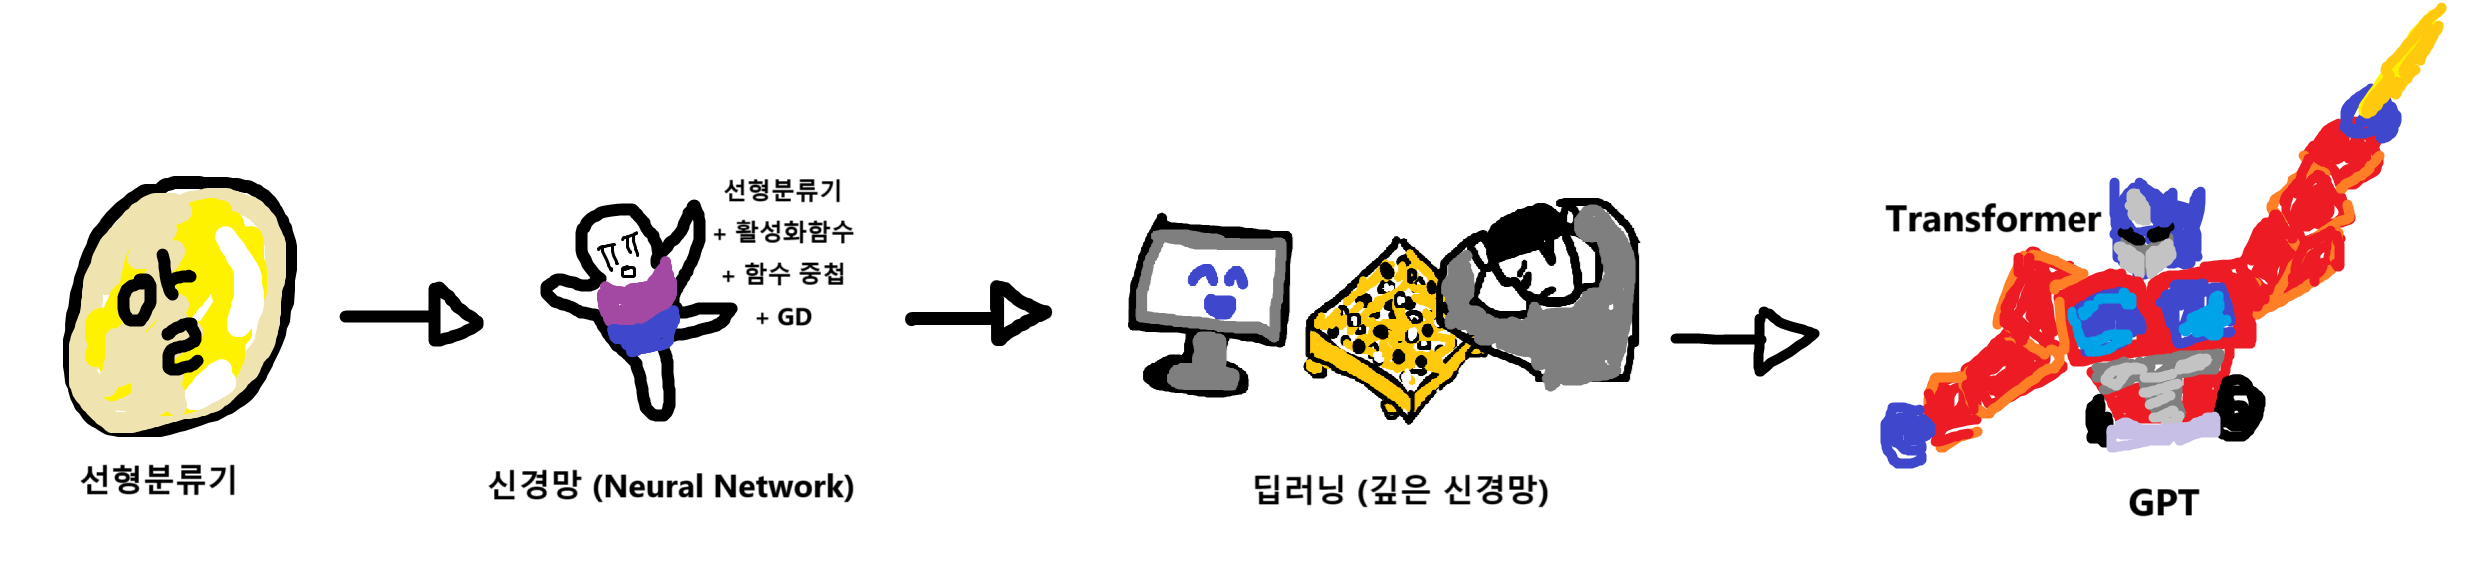

### 선형분류기
- 선형분류기는 y = ax + b 로 선을 그어서 분류하는 모델입니다.
- 선 위로는 A 클래스, 선 아래로는 B 클래스
- 아래 그림에서는 일부 오차는 있지만, 선형분류기는 잘 동작 할겁니다.

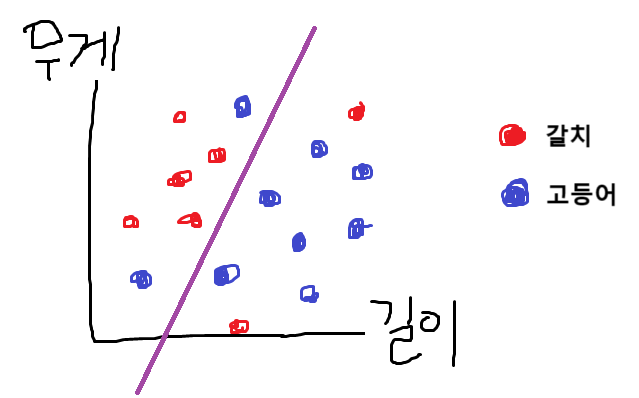

- 아래는 선형분류기 예시입니다.
  - 선 아래인 파란색에 속하면 고등어 입니다.
  - 선 위쪽인 빨간색에 속하면 갈치 입니다.

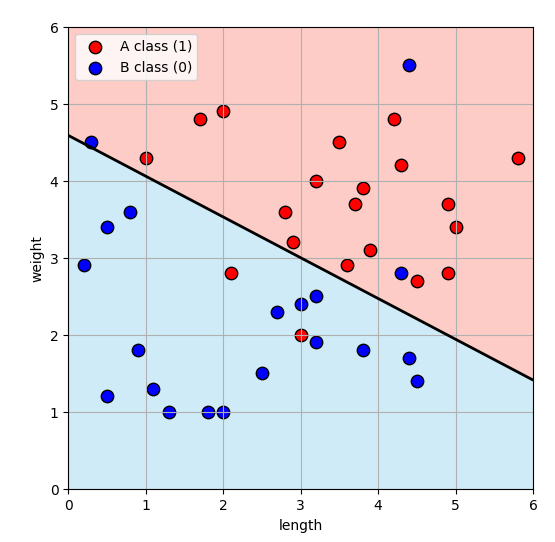

### XOR 문제
- XOR은 선형분류기로 분리를 할 수 없습니다.
- 마빈 민스키 박사님이 XOR 문제를 해결 못한다고 강조했고, AI에 겨울이 찾아왔습니다. (1970년)

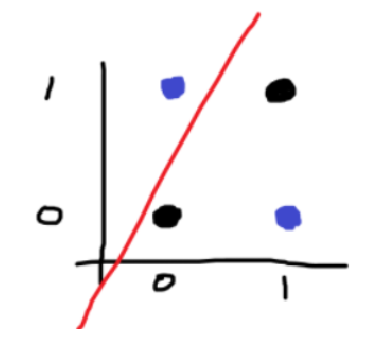


- XOR 문제를 풀려면, 선을 구부리면 됩니다.
  - 함수 중첩과 활성화 함수를 사용하면 비선형을 표현합니다.
  - 오류 역전파(Backpropagation) 알고리즘을 이용한 경사 하강법으로 학습(1986년, 제프리 힌튼 교수님)
  - 수학적 원리는.. 다른 교수님이 잘 설명해주실겁니다. ^^

- 아래 수식에서 f() 는 활성화 함수를 표현했습니다.
  - 활성화 함수가 뭐고, 함수 중첩에 대한 자세한 내용은 조금 있다가 다룰겁니다.

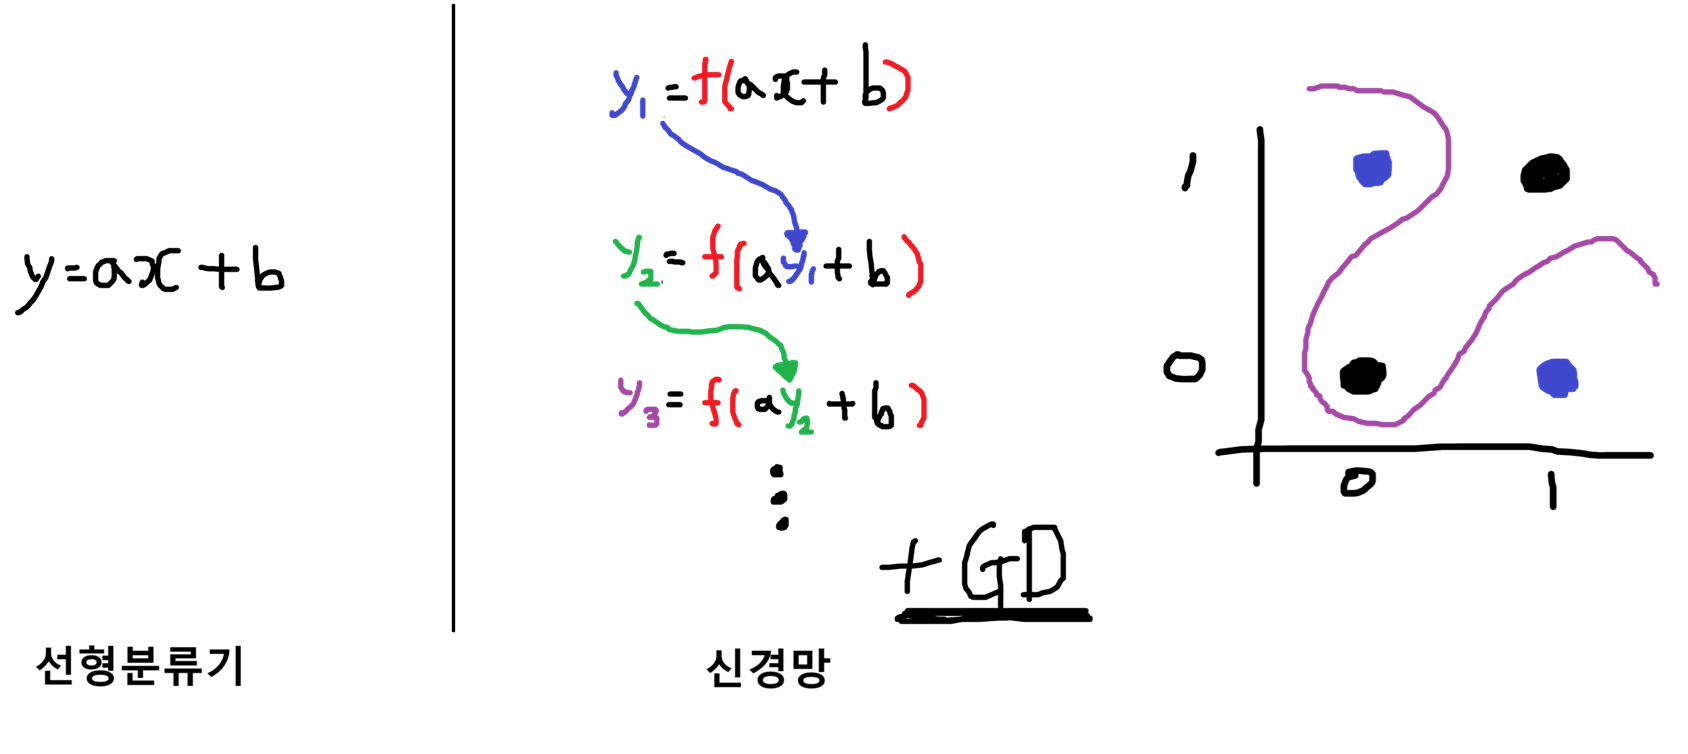

# 2. 이번 과정의 목표
- [선형분류기 > **신경망** > 딥러닝 > GPT] 순서로 AI가 발전되었다고  소개드렸는데요. 이번 챕터 주제는 신경망입니다.
- 신경망, 딥러닝 라이브러리인 Pytorch 라이브러리를 사용할겁니다.
  - 1. PyTorch를 소개하고
  - 2. 신경망(Neural Network, NN)을 다룹니다.
  - 3. 신경망으로 선형회귀, 로지스틱회귀를 만들어봅니다.
  - 4. 신경망 발전 역사에 대해 가볍게 알아봅니다.
  - 5. 신경망으로 숫자 분류기를 만들어봅니다. (MNIST 데이터셋 사용)

# 3. PyTorch 소개
- Deep Learning을 쉽게 구현하도록 만들어진 오픈소스 Library 입니다.
  - 예전에는 텐서플로우(구글)이 딥러닝 Library의 왕이 었습니다.
    - C++로 만들어졌고, 성능도 빨라요.
    - 개발자가 쓰기엔 괜찮은데, AI연구자가 쓰기엔 코딩 지식이 많이 필요해서 쓰기 힘들어요.
  - 그리고 PyTorch(meta)와 여러가지 여러 딥러닝 라이브러리가 나왔습니다.
    - AI연구자들 사이에서 PyTorch 인기가 폭발했습니다.
    - 새로운 기능은 항상 텐서플로우가 먼저 개발되고, PyTorch가 조금 더 있다가 출시되었죠.
    - 당시 AI연구자들 사이에서도 텐서플로우 할줄알면 "올~ 쫌 하네?" 라는 분위기 였습니다
  - 현재는 PyTorch 인기가 텐서플로우 인기를 앞섰습니다.
    - 이제는 PyTorch나 텐서플로우나 새로운 기능은 거의 동시에 출시됩니다.
    - PyTorch는 텐서플로우보다 파이써닉합니다. (간결합니다.)
    - 디테일한 연산 과정과, 옵션들은 숨겨져 있습니다.
      - 텐서플로우는 Spring MVC, PyTorch는 Spring Boot로 비유할수 있겠습니다.
      - 파이썬은 텐서플로우를 Django로, PyTorch를 flask로 비유하겠습니다
  - 텐서플로우는 아직도 많이 쓰입니다.
    - AI 연구자에게 인기는 적어졌지만, 디테일한 옵션과 최적화를 해야하는 극단적인 세팅이 필요한 환경에서는 여전히 쓰입니다.
    - '왕'의 자리는 PyTorch에게 물려줬지만, 초 대규모 모델 개발시 or 초 소형 모델 개발시(임베디드 환경)에는 아직 필요합니다.



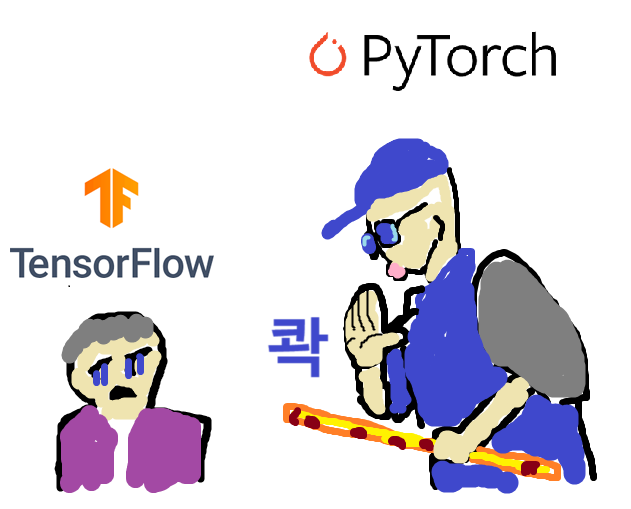

# 4. PyTorch 기본 사용법
- Numpy Array 대신 텐서(Tensor)를 사용합니다. (특징 : **GPU 가속** 및 **자동 미분**)
  축과 차원

  - PyTorch Library에서는 벡터를 1차원 텐서라고 합니다. (1개의 축)
  - PyTorch Library에서는 행렬을 2차원 텐서라고 합니다. (**행**과 **열** 2개의 축)
  - PyTorch Library에서는 행렬들이 N 개있으면 을 3차원 텐서라고 합니다.
  (높이 너비 채널, xyz)
  - PyTorch Library에서는 3차원 텐서가 N개 있으면 4차원 텐서라고 합니다.
  (배치 크기  채널  높이  너비)


In [3]:
import torch
import numpy as np

a = torch.tensor([1, 2, 3]) # 1차원 텐서 (벡터)

b = torch.tensor([[1, 2, 3], [4, 5, 6]]) # 2차원 텐서 (행렬)

c = np.array([1,2,3])

print(a)
print()
print(b)
print()
print(c)

#print(type(c))
#print(c.dtype)
#print(c.shape)

tensor([1, 2, 3])

tensor([[1, 2, 3],
        [4, 5, 6]])

[1 2 3]
<class 'numpy.ndarray'>


### Numpy Array와 Tensor 차이
- Numpy array는 CPU 로 계산을 합니다. Tensor는 CPU 뿐만 아니라 GPU로도 계산을 할수 있습니다.
- PyTorch로 딥러닝 할때는 Numpy 대신 Tensor를 쓰면 됩니다.
  - Numpy와 문법이 거의 똑같습니다.

- 아래 3개의 샘플코드를 이해해주세요.


In [13]:
import numpy as np
import torch

# NumPy
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print((a + b) @ b) # 행렬 합과 곱


#print(np.matmul((a+b), b))
#print(np.dot((a + b), b))
print()

# PyTorch
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
print((a + b) @ b) # 행렬 합과 곱
#print(torch.matmul((a+b), b))
#print(torch.dot(a, b)) error, 1차원 텐서만 가능 행렬 불가

[[ 86 100]
 [134 156]]

tensor([[ 86, 100],
        [134, 156]])


In [27]:
import numpy as np
import torch

# NumPy
a = np.array([[1, 2], [3, 4]])
print(a ** 2) # 제곱
print(np.sum(a)) # 전체 합
print(np.mean(a)) # 평균
#print(np.log(a)) #e(자연로그)
print()



# PyTorch
a = torch.tensor([[1, 2], [3, 4]])
print(a ** 2) # 제곱
print(torch.sum(a)) # 전체 합
print(torch.mean(a.float()))
#print(torch.mean(a.to(torch.float64)))
#print(torch.log(a.float()))

[[ 1  4]
 [ 9 16]]
10
2.5

tensor([[ 1,  4],
        [ 9, 16]])
tensor(10)
tensor(2.5000)
tensor(2.5000, dtype=torch.float64)


In [28]:
import torch

# MSE
def loss(y_hat : torch.Tensor, y : torch.Tensor) :
  return torch.mean((y_hat - y) ** 2)

# 예측값과 실제값
y_hat = torch.tensor([2.5, 0.0, 2.1, 7.8])
y = torch.tensor([3.0, -0.5, 2.0, 7.0])

# MSE 출력
print(loss(y_hat, y))

tensor(0.2875)


### 그럼 Tensor만 쓰면 되고, Numpy 안써도 되는거 아니예요?
- PyTorch로 신경망, 딥러닝 모델 다룰때는 Numpy 안써도 됩니다. Tensor로 다 됩니다.
  - matplotlib은 Numpy와 PyTorch의 Tensor 모두 지원합니다.
  - LLM Library 들은 Numpy 보다는 PyTorch의 Tensor를 더 선호합니다.
- 그런데 아래 Library에서는 PyTorch의 Tensor가 아닌 Numpy를 지원합니다.
  - OpenCV : 이미지 전처리, 영상처리의 AI의 왕
  - Scikit-learn : 머신러닝의 왕

<br/>

- 그래서 AI를 배울때는 Numpy랑 PyTorch의 Tensor 모두 배워야합니다.
- PyTorch의 Tensor나 Numpy나 사용방법이 비슷해서, 둘다 배우면 좋습니다.

# 5. PyTorch의 자동 미분 기능 - Autograd (Automatic Gradient)
- Gradient : 미분값(기울기) 입니다.
  - 사람이 수학식을 코딩할 필요 없이, 함수 호출로 미분결과를 빠르게 얻을 수 있습니다.
- 학습을 할때(GD할때) 미분을 계속 하잖아요? **미분을 빨리할 수 있다면 학습 속도가 올라갑니다!.**
  - 그래서 AI에서 자동 미분 기능은 정말 중요한 기능이라고 할 수 있습니다.
- Tensor 내부적으로.. 엄청 빠른 미분계산을 위해, 내부 세팅을 해둡니다.
  - 다른 연산 도중에도.. 언제든지 미분값을 빠르게 계산할수있도록 자동으로 내부
  세팅을 해둡니다.
  - 그러다가 미분이 필요하다고 하면? 바로 확! 계산해서 Gradient 값을 벹어주는 겁니다.
  - EASY 교안에서는 내부적으로 어떻게 미분값을 빨리 계산해내는가는 다루지 않습니다!
- 미분 추적 기능을 ON / OFF 할 수 있습니다.
  - **미분 추적 기능** 을 ON 하면, 내부적으로 미분을 빠르게 계산할 수 있게 지속적으로 내부 연산을 합니다.
  - **미분 추적 기능** 은 불필요할 때는 OFF 해줘야, 메모리나 계산속도 저하가 없습니다.

In [34]:
x = torch.tensor(2.0, requires_grad=True) # requires_grad=True <-- 미분 추적 기능 ON 0차원 텐서, 하나의 값
y = x**2 + 3*x + 1 # <--- 이거 연산할 때, 빠른 미분을 위한 내부 연산도 이뤄집니다. (순전파, 예측값 예상)
y.backward() # 내부 연산을 이용한.. 빠른 미분 계산 수행 명령어 (역전파)
print(x.grad)  # 결과 확인 (미분값 출력)
# 자동 미분 x^2 + 3x + 1 -> 2x + 3(2) -> 7


# 미분 추적 기능 OFF
with torch.no_grad(): # with 문 내부 코드는, 추적 기능 OFF 된 상태로 동작됩니다.
  y = x ** 2 + 5*x + 10 # <--- 이때는 빠른 미분을 위한 내부연산 안함
  #y.backward() # 에러 발생


# 다시 여기서 부터는 미분 추적 기능이 ON 됩니다.
y = x ** 2 + 4*x + 1
y.backward()
print(x.grad)

#2x + 4 -> 8에 기존의 값 7 경사누적

tensor(7.)
tensor(15.)


### 미분 추적 기능은.. 언제 ON 하고, 언제 OFF 하나요?
- ON 할때
  - 학습할 때 부터 ON 하면 됩니다.
  
- OFF 할때
  - 중간 평가(Validation) 할때나 최종평가 (Test) 할때는 OFF 하면 됩니다.
  - 시각화 할때 OFF 하면 됩니다.

### 결론
- PyTorch의 Tensor는 Numpy처럼 연산이 가능합니다.
- Numpy에는 없지만 Tensor에 있는 기능은 다음과 같습니다
  - 빠른 미분 계산 기능을 지원합니다. 빠른 미분 계산은 AI 학습에서 엄청 중요하죠.
  - GPU 연산도 지원

# 6. nn.Linear의이해
- 신경망으로 넘어오겠습니다.
- 신경망의 기본 수식은 y = ax + b 입니다. 선형함수라고 하고 PyTorch에서는 nn.Linear()로 표현합니다.
- 그 동안 y = ax + b 라고 했는데, 신경망 이론에서는 기울기와 절편이 아닌 다른 용어를 씁니다.
  - 수학에서는 기울기(a)와 절편(b)이라는 말을 쓰지만, 딥러닝에서는 Weight와 Bias 라는 말을 사용합니다.
  - 의미는 같고 용어만 바뀐겁니다. 앞으로 Weight와 Bias 라고 하겠습니다.

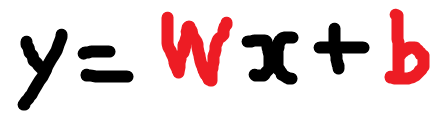

### 선형함수의 입력과 출력의 개수
- tip 데이터셋 기억나시죠?
  - 입력 : total_bill(결제금액)
  - 출력 : tip(받은 팁)
- 여기서 입력과 출력의 개수는 각각 1개, 1개입니다.
- 입력 데이터가 여러개 일수도 있습니다.
  - 입력 1 : 결제금액
  - 입력 2 : 사람 연령대
  - 출력 : 받은 팁
- 위와 같은 입력1, 2에 따른 팁을 추정할 수 있는 모델이 되겠습니다.
- 수식으로 표현하면 다음과 같습니다.

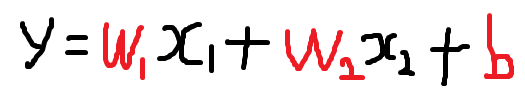

- 그러니까 MSE가 최소가 나오는 w1, w2, b 를 찾아야 하는것이죠.
- 행렬식으로도 알고 있어야합니다. 아래와 같이 표현합니다.

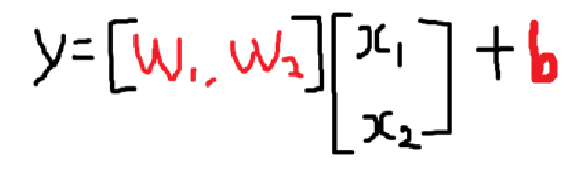

- 이를 기억해주세요.
  - **입력 값 개수에 따라, 학습이 필요한 weight의 개수가 늘어납니다.**

- 입력 데이터 뿐만 아니라 출력 데이터도 여러개 일 수 있습니다.
- 입력 1, 출력 2 예시입니다.
  - 입력 : 결제금액
  - 출력 : 받은 팁
  - 출력 : 웨이터를 호출한 횟수


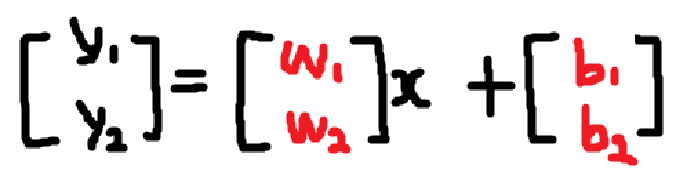

- 이를 기억해주세요.
  - **출력 값의 개수에 따라, 학습에 필요한 w, b 세트 개수가 늘어납니다.**

- 이번엔 입력 3개, 출력 2개 예시입니다.
  - 하나의 입력당 weight가 3개 필요합니다.
  - 하나의 출력당, weight와 bias가 2세트 필요합니다.

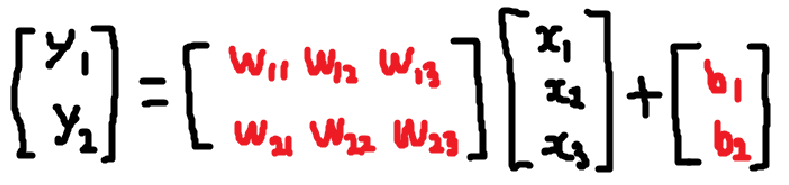

- 입력과 출력 값의 개수에 따라, 학습할 파라미터 개수가 많아지면, 학습 속도가 느려질겁니다
  - GD 하는데, MSE가 작은 곳 까지 도달하는데 한참 걸릴겁니다.
  - **y = Wx + b 의 형태를 유지하는 건 변함이 없습니다.**

- 다시 돌아와서...
- 입력데이터 1개, 출력 데이터 1개 일때 실습을 해보겠습니다.
- tip 데이터로 선형회귀를 만들어보죠.
- 아래 코드를 이해해봅시다

Parameter containing:
tensor([[-0.0798]], requires_grad=True)
Parameter containing:
tensor([0.6733], requires_grad=True)
Epoch    0 | Loss: 18.9771
Epoch  400 | Loss: 1.0433
Epoch  800 | Loss: 1.0416
Epoch 1200 | Loss: 1.0403
Epoch 1600 | Loss: 1.0393

[학습완료]
학습된 가중치(weight): 0.11016567796468735
학습된 편향(bias)) : 0.7980816960334778




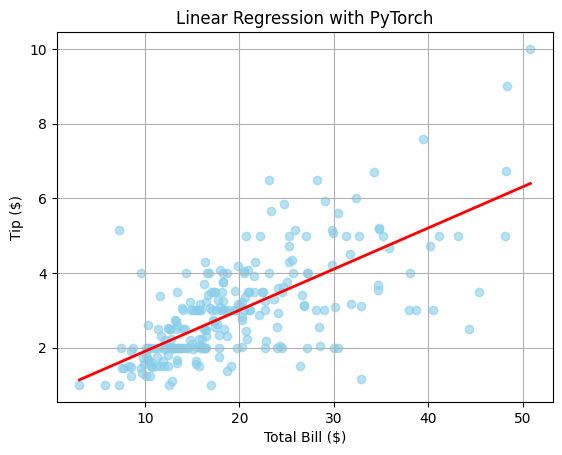

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비 (Seaborn의 tips 데이터셋)
tips = sns.load_dataset("tips")

# 입력(X): total_bill, 출력(y): tip
# 아래 dtype은 데이터 타입을 float 으로 저장하라는 뜻입니다
X = torch.tensor(tips["total_bill"].values, dtype=torch.float32).reshape(-1, 1)
y = torch.tensor(tips["tip"].values, dtype=torch.float32).reshape(-1, 1)

# 모델 정의 - 선형함수 y = wx + b 하나 생성
model = nn.Linear(1, 1)  # 입력 1개(total_bill), 출력 1개(tip)

#이 객체를 생성하는 순간, 가중치 w와 편향 b가 무작위 값으로 초기화
#print(model(X))

#출력된 [-15.9502], [-9.9707] 같은 값들은 무작위로 초기화된 모델이 내놓은 초기 예측 팁 금액
#값들이 음수이거나 실제 팁 금액(1달러 ∼ 10달러 사이)과 동떨어져 있는 것은 아직 모델이 데이터를 전혀 학습하지 않았기 때문
#학습이란? 모델의 예측값과 실제값의 차이(손실) 을 계산하고, 손실을 줄이기 위해 W와 b를 수정하는 과정

#https://docs.pytorch.org/docs/stable/nn.html#linear-layers


#print(model.weight)
#print(model.bias) 미분 추적 확인

# 손실함수 & 옵티마이저
# 옵티마이저 = weight, bias를 변경하는 알고리즘 종류, GD를 사용합니다.
criterion = nn.MSELoss() # MSE 사용 (목적함수 : 최소화 하거나 최대화 하고싶음, 손실함수 : 값을 최소화 하고싶은 목적함수)
optimizer = optim.SGD(model.parameters(), lr=0.001) # 옵티마이저 = SGD
#https://docs.pytorch.org/docs/stable/optim.html

# 학습 루프
for epoch in range(2000): # 점프 2000번~!
    y_hat = model(X) #모델 예측
    #순전파(Forward Pass). 입력 X를 모델에 넣어 예측값 계산


    loss = criterion(y_hat, y) #로스(손실) 계산

    optimizer.zero_grad() #미분 계산 초기화 (PyTorch는 기울기 누적)
    loss.backward() #역전파 미분 계산 수행후 저장

    optimizer.step() #SGD 점프 1회 (w, b 값이 업데이트)

    if epoch % 400 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.4f}")

# 학습 결과 출력
print()
print('[학습완료]')
print(f'학습된 가중치(weight): {model.weight.item()}')
print(f'학습된 편향(bias)) : {model.bias.item()}')
print()

# 예측 선 준비
with torch.no_grad():
  x_line = torch.linspace(X.min(), X.max(), 100).reshape(-1, 1)
  y_line = model(x_line)

# 시각화
plt.scatter(X.numpy(), y.numpy(), color='skyblue', alpha=0.6)
plt.plot(x_line.numpy(), y_line.numpy(), color='red', linewidth=2)
plt.title("Linear Regression with PyTorch")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.grid(True)
print()

### 위 소스코드에서 미분 추적기능 ON 안했는데, 미분이 되네요?!
- model = nn.Linear(1, 1) 코드를 실행하면 내부적으로 2개의 파라미터가 생성됩니다.
  - model.weight 텐서
  - model.bias 텐서
- 그리고 위 Tensor 값은 requires_grad = True 옵션으로 생성됩니다.
- **결론적으로 nn.Linear() 함수 수행부터 '미분 추적 기능'이 ON 됩니다.**


# 7. 함수 중첩과 Sequencial Model
- 수학적으로 함수 중첩이라는 말을 먼저 살펴보겠습니다.


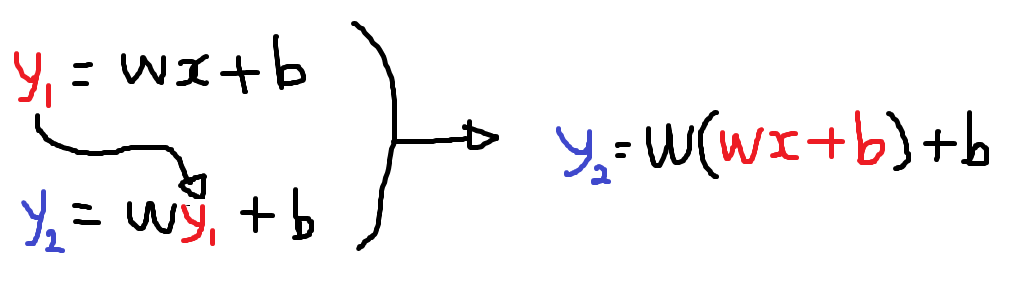

- 수학에서는 한 함수의 결괏값이 다른 함수의 입력값으로 들어오는 것을 함수 중첩이라고 합니다.
- 신경망에서는 "함수 중첩"이라는 용어를 안쓰고, Sequencial(순차적) Model 구조라고 합니다.

### Sequencial Model 언제 쓰죠?
- 우리 썼었어요~. 로지스틱 회귀할 때 사용했습니다.
  - y = sigmoid(ax + b) 기억나시죠?
- PyTorch 에서는 이 Sequencial Model 을 만들기 위한 간결한 문법을 지원합니다.
- 공부시간별 합격 확률을 구하는 로지스틱 회귀 예시를 PyTorch로 만들어보겠습니다.

Epoch   0 | Loss: 1.5639
Epoch 100 | Loss: 0.3170
Epoch 200 | Loss: 0.2632
Epoch 300 | Loss: 0.2286
Epoch 400 | Loss: 0.2043
학습완료



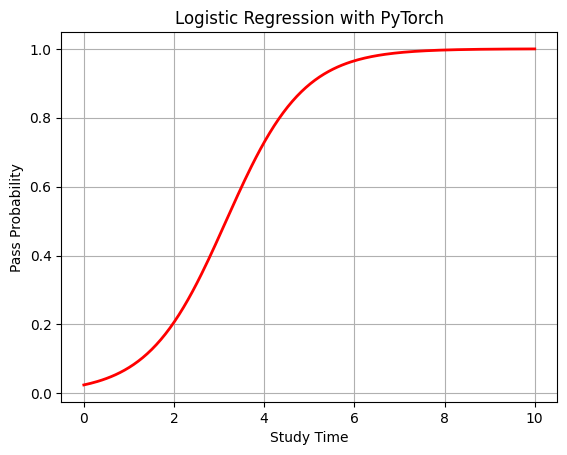

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 공부 시간
X = torch.tensor([
    [1.0], [2.0], [3.0], [4.0], [5.0], [6.0],
    [2.0], [3.0], [4.0], [5.0], [6.0], [7.0],
    [1.0], [2.0], [3.0], [4.0], [5.0], [6.0],
    [7.0], [8.0], [2.0], [3.0], [4.0], [5.0],
    [6.0], [7.0], [8.0], [9.0], [10.0]
])

# 합격 여부 (0 : 불합격, 1 : 합격)
y = torch.tensor([
    [0.0], [0.0], [0.0], [1.0], [1.0], [1.0],
    [0.0], [0.0], [1.0], [1.0], [1.0], [1.0],
    [0.0], [0.0], [0.0], [1.0], [1.0], [1.0],
    [1.0], [1.0], [0.0], [0.0], [1.0], [1.0],
    [1.0], [1.0], [1.0], [1.0], [1.0]
])

# [중요] 아래 모델은 sigmoid(wx + b) 가 됩니다.
model = nn.Sequential( #순서대로 위에서 아래로 차례대로 통과
    nn.Linear(1, 1),
    nn.Sigmoid()
)

#단일 퍼셉트론과 유사

"""
nn.Linear(1, 1) ->  nn.Linear(입력 차원, 출력 차원) 형태로 사용
입력 1: 입력 데이터의 특징이 1개
출력 1: 선형 변환 결과로 1개의 값을 출력.
내부적으로 y=Wx+b
"""

"""
nn.Sigmoid()
모델의 두번째 단계 -> 활성화 함수(Activation Function)를 적용
-> 선형 변환 결과(z)에 비선형적인 왜곡을 주어(a=f(z)) 모델이 곡선적이거나 복잡한 데이터 관계를 학습할 수 있게

Sigmoid 함수는 입력값을 받아 0과 1 사이의 값으로 압축하는 비선형 함수

대표적인 활성화함수 : sigmoid , ReLU, Tanh, Softmax(은닉층 아님!)

"""

"""
 nn.Linear(1,1) 레이어를 통과하여 선형 결과 (y=WX+b)
선형 결과 y가 nn.Sigmoid() 함수를 통과하여 최종 예측값 y^ =σ(z)
"""

criterion = nn.BCELoss() # Binary 크로스 엔트로피 로스 펑션
optimizer = optim.SGD(model.parameters(), lr=0.1) # GD 사용

for epoch in range(500):
    y_hat = model(X)

    loss = criterion(y_hat, y)

    optimizer.zero_grad() # 초기화
    loss.backward() # 미분 계산

    optimizer.step() # 학습 (w, b 값 업데이트)

    if epoch % 100 == 0:
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.4f}")

print('학습완료')

# 예측 선 준비
with torch.no_grad():
  x_line = torch.linspace(0, 10, 200).reshape(-1, 1)
  y_line = model(x_line)

# 시각화
plt.plot(x_line.numpy(), y_line.numpy(), color='red', linewidth=2)
plt.title("Logistic Regression with PyTorch")
plt.xlabel("Study Time")
plt.ylabel("Pass Probability")
plt.grid(True)
print()

# 8. 함수의 중첩과 활성화 함수로 비선형 구현하기


- y = wx + b와 같은 구조로는 치킨 라인, 고양이 곡선 처럼 비선형을 표현할 수 없었습니다.
  - y = w(w(wx + b) + b) + b .. 와 같이 함수 중첩으로도 비선형을 표현할 수 없었습니다.
- 그런데 활성화 함수와 함수 중첩을 함께 사용하니까, 모든 비선형 곡선을 표현할 수 있습니다.
  - 수학적 원리는 EASY 교안에서 다루지 않습니다.
  - 수학적 원리는 교수님이 설명해주실겁니다. ^^


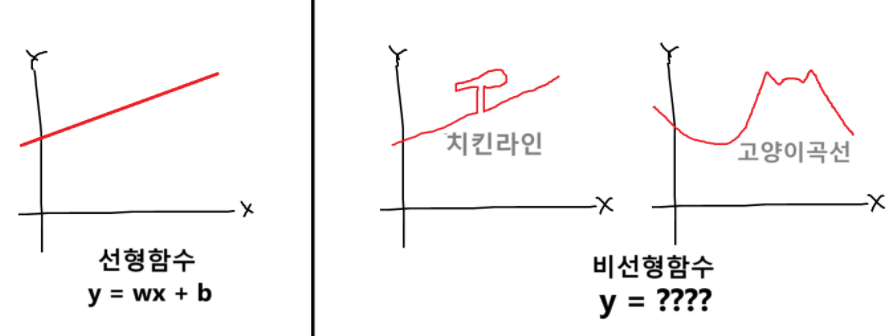

- 우리는 결과만 이해하도록 하겠습니다.
- 활성화 함수는 대표적으로 ReLU (렐루라고 읽습니다. 할렐루야 할때 렐루입니다.) 가 있습니다.
- ReLU 는 단순합니다.
  - 음수는 모두 0으로 바꾼다.
  - 양수는 그대로 사용한다.
- ReLU 는 조건부 수식으로 표현합니다.

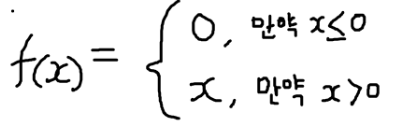

- ReLU 함수 자체는 비선형 방정식입니다.
  - 선형 방정식(y = ax + b로 표현될 수 있는 방정식)이 아닌건 다 비선형입니다.
- 수학자에 의해 **비선형 방정식의 중첩으로, 모든 비선형을 나타낼 수 있음**은 1980년대에 증명이 되었습니다.
  - 그리고 비선형 방정식 중에 특히 ReLU는 학습 속도에 되게 좋아요! 라고 제프리힌튼 교수님이 강조하고, 실 사용에 증명했습니다. (2010년)
- 고양이, 치킨곡선 같은 것도, 비선형 방정식 중첩으로 표현할 수 있습니다.
  - 제가 이름을 지은 곡선입니다.


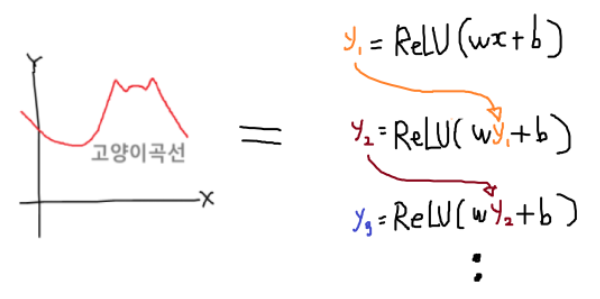

- 신경망 이론에서는 비선형 방정식의 각 단계를 'Layer' 라고 부르기로 했습니다.



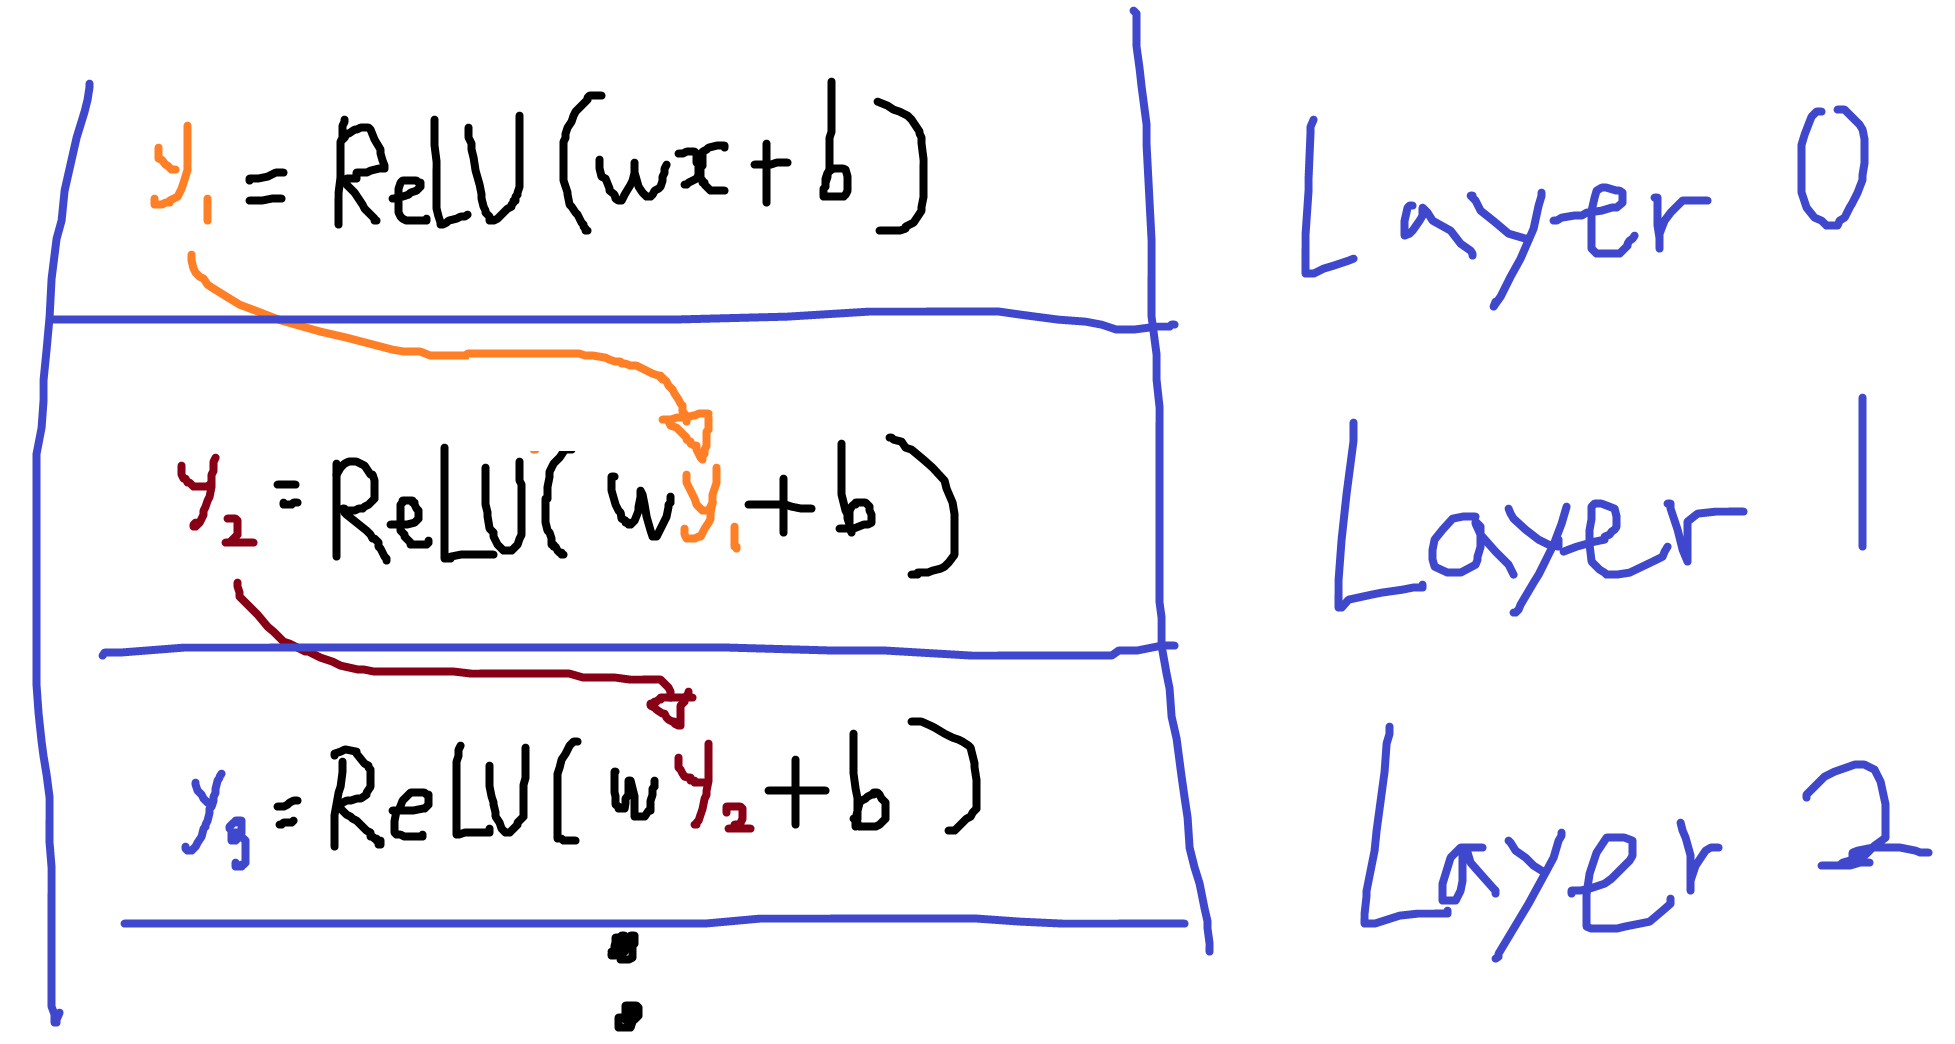

### [참고] 학습 결과 비선형 방정식이 만들어지는 예시

- 비선형 방정식의 중첩으로 고양이 곡선을 한번 만들어보겠습니다.
- 내부 코드는 가볍게 살펴봐주세요.
  - 레이어 입력과 출력 개수에 대한 설명은 나중에 하겠습니다.
  - 레이어 개수, 레이어의 입력과 출력 개수, lr, epoch 전부 하이퍼파라미터입니다.


Epoch     0 | Loss: 40.300613
Epoch   500 | Loss: 0.032842
Epoch  1000 | Loss: 0.022678
Epoch  1500 | Loss: 0.008208
Epoch  2000 | Loss: 0.009838
Epoch  2500 | Loss: 0.006829
Epoch  3000 | Loss: 0.006239
Epoch  3500 | Loss: 0.006290
Epoch  4000 | Loss: 0.004374
Epoch  4500 | Loss: 0.067339
Epoch  5000 | Loss: 0.004016
Epoch  5500 | Loss: 0.003740
Epoch  6000 | Loss: 0.002477
Epoch  6500 | Loss: 0.011562
Epoch  7000 | Loss: 0.002324
Epoch  7500 | Loss: 0.002137
Epoch  8000 | Loss: 0.015623
Epoch  8500 | Loss: 0.076447
Epoch  9000 | Loss: 0.037188
Epoch  9500 | Loss: 0.001799



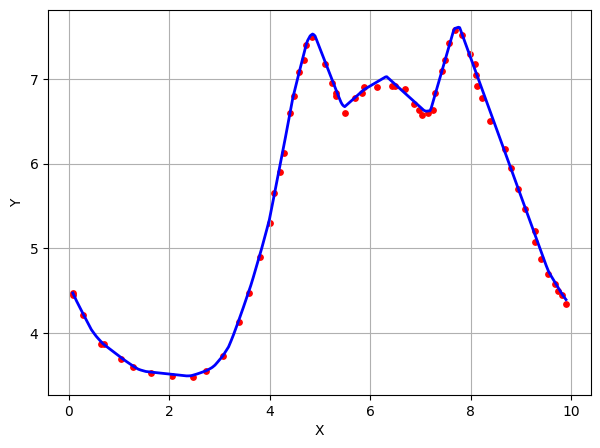

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 고양이 좌표
data = torch.tensor([
    [0.65, 3.87],[0.08, 4.47],[0.08, 4.45],[0.28, 4.22],[0.70, 3.87],
    [1.03, 3.70],[1.28, 3.60],[1.63, 3.53],[2.05, 3.50],[2.48, 3.48],
    [2.73, 3.55],[3.08, 3.73],[3.38, 4.13],[3.58, 4.47],[3.80, 4.90],
    [4.00, 5.30],[4.08, 5.65],[4.20, 5.90],[4.28, 6.13],[4.40, 6.60],
    [4.48, 6.80],[4.58, 7.08],[4.68, 7.22],[4.73, 7.40],[4.85, 7.50],
    [5.10, 7.18],[5.25, 6.95],[5.33, 6.83],[5.33, 6.80],[5.50, 6.60],
    [5.70, 6.78],[5.83, 6.83],[5.88, 6.90],[6.13, 6.90],[6.43, 6.92],
    [6.50, 6.92],[6.70, 6.88],[6.88, 6.70],[6.98, 6.63],[7.03, 6.57],
    [7.30, 6.83],[7.43, 7.10],[7.50, 7.22],[7.58, 7.42],[7.68, 7.58],
    [7.15, 6.60],[7.25, 6.63],[7.83, 7.52],[7.98, 7.30],[8.08, 7.18],
    [8.10, 7.05],[8.13, 6.92],[8.23, 6.78],[8.38, 6.50],[8.68, 6.17],
    [8.80, 5.95],[8.95, 5.70],[9.08, 5.47],[9.28, 5.20],[9.28, 5.08],
    [9.40, 4.88],[9.55, 4.70],[9.68, 4.58],[9.75, 4.50],[9.83, 4.45],
    [9.90, 4.35]
], dtype=torch.float32)

# 입력(X), 출력(y)
X = data[:, [0]]
y = data[:, [1]]

"""
X(입력): data 텐서의 첫 번째 열([0])을 슬라이싱하여 X (입력 특성)로 사용 ( 고양이 그림의 가로 좌표 )
reshape 과정 없이 [:, [0]] 형태로 이미 (N,1) 크기

y (출력): data 텐서의 두 번째 열([1])을 슬라이싱하여 y (정답 레이블)로 사용 (고양이 그림의 세로 좌표입니다.)
"""




# 모델 정의 (비선형 MLP)
model = nn.Sequential(
    nn.Linear(1, 64), # Layer 0, 입력은 1개, 출력은 64개
    nn.ReLU(),
    nn.Linear(64, 128), # Layer 1, 입력은 64개, 출력은 128개
    nn.ReLU(),
    nn.Linear(128, 128), # Layer 2, 입력은 128개, 출력 128개
    nn.ReLU(),
    nn.Linear(128, 1) # Layer 3, 최종 출력은 1개
)

"""
다층 퍼셉트론(MLP) 구조: 선형 레이어(nn.Linear)와 비선형 활성화 함수(nn.ReLU)의 조합으로 깊은 신경망을 구성하여 복잡한 비선형 패턴을 학습하도록 설계

Layer 0 (은닉층): 입력 특성 1개(X 좌표)를 받아 64개의 뉴런(특징)으로 확장합니다. ReLU를 통과하여 비선형성을 부여
Layer 1 (은닉층): 64개의 입력을 받아 128개의 뉴런으로 확장하고, ReLU적용
Layer 2 (은닉층): 128개의 입력을 받아 128개의 뉴런을 유지하고, ReLU}를 적용합니다
Layer 3 (출력층): 최종적으로 128개의 은닉층 출력을 받아 1개의 최종 출력(Y 좌표 예측값)을 내보냅니다.


회귀(Regression) 문제의 경우, 출력 값의 범위에 제한을 두지 않기 위해 마지막 nn.Linear 다음에는 활성화 함수를 생략하는 것이 일반적


회귀의 목표는 연속적인 수치 값을 예측 (예: 집값, 온도, 이 코드에서는 고양이 좌표의 Y 값)
예측 값은 특정 범위에 갇혀 있으면 안 되며, −∞에서 +∞을 가질 수 있어야 함

활성화 함수의 영향 :
ex)Sigmoid: 출력을 0과 1 사이로 제한합니다. → 이진 분류에 적합.
ex)ReLU: 출력을 제한 (음수 값은 0이 됨).

활성화 함수를 마지막 레이어에 사용하면, 모델이 음수 값이나 특정 범위를 벗어난 값을 절대 예측할 수 없게 되어 회귀 성능이 저하되므로
마지막 nn.Linear 다음에는 활성화 함수를 생략하는 것이 일반적
"""





# 손실함수 & 옵티마이저
criterion = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.01) # GD
optimizer = optim.Adam(model.parameters(), lr=0.005) # 그냥 GD 보다 Adam 이 성능이 더 잘나와요.

# 학습 루프
for epoch in range(10000):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss.item():.6f}")

# 예측 곡선 생성
with torch.no_grad():
    x_line = torch.linspace(X.min(), X.max(), 400).reshape(-1, 1)
    y_line = model(x_line)

# 시각화
plt.figure(figsize=(7,5))
plt.scatter(X.numpy(), y.numpy(), color='red', s=15)
plt.plot(x_line.numpy(), y_line.numpy(), color='blue', linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
print()


- 다음은 치킨 곡선입니다.
  - 치킨곡선의 특징은 한 x에 여러개 y가 존재하는 차트입니다.
  - 따라서 MLP로 표현할 수 없고 다음과 같이 그릴 수 있습니다.
    - 입력 : t 시간
    - 출력 : [x, y] 좌표
    - 한 x에 y가 여러개 일 수 있어서 y = ax + b형태로 나타낼 수 없음

Epoch     0 | Loss: 24.059029
Epoch  1000 | Loss: 0.727815
Epoch  2000 | Loss: 0.345739
Epoch  3000 | Loss: 0.138506
Epoch  4000 | Loss: 0.053017
Epoch  5000 | Loss: 0.038075
Epoch  6000 | Loss: 0.028621
Epoch  7000 | Loss: 0.020901
Epoch  8000 | Loss: 0.015843
Epoch  9000 | Loss: 0.012410
Epoch 10000 | Loss: 0.010544
Epoch 11000 | Loss: 0.009141
Epoch 12000 | Loss: 0.008140
Epoch 13000 | Loss: 0.007297
Epoch 14000 | Loss: 0.006674



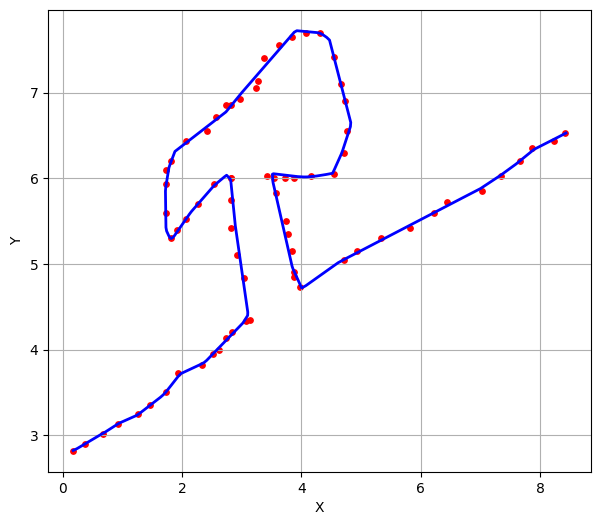

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 치킨 좌표
data = torch.tensor([
    [0.17, 2.82], [0.37, 2.90], [0.67, 3.02], [0.92, 3.13], [1.27, 3.25],
    [1.47, 3.35], [1.74, 3.50], [1.94, 3.73], [2.34, 3.82], [2.52, 3.95],
    [2.62, 4.00], [2.74, 4.13], [2.84, 4.20], [3.07, 4.33], [3.14, 4.35],
    [3.04, 4.83], [2.92, 5.10], [2.82, 5.42], [2.82, 5.75], [2.82, 6.00],
    [2.82, 6.00], [2.54, 5.93], [2.27, 5.70], [2.07, 5.53], [1.92, 5.40],
    [1.82, 5.30], [1.74, 5.60], [1.74, 5.93], [1.74, 6.10], [1.82, 6.20],
    [2.07, 6.43], [2.57, 6.72], [2.74, 6.85], [2.82, 6.85], [2.97, 6.92],
    [3.24, 7.05], [2.42, 6.55], [3.27, 7.13], [3.37, 7.40], [3.62, 7.55],
    [3.84, 7.65], [4.07, 7.70], [4.32, 7.70], [4.54, 7.42], [4.67, 7.10],
    [4.74, 6.90], [4.77, 6.55], [4.72, 6.30], [4.54, 6.05], [4.17, 6.03],
    [3.87, 6.00], [3.72, 6.00], [3.54, 6.00], [3.42, 6.03], [3.57, 5.83],
    [3.74, 5.50], [3.77, 5.35], [3.84, 5.15], [3.87, 4.90], [3.87, 4.85],
    [3.97, 4.73], [4.72, 5.05], [4.94, 5.15], [5.34, 5.30], [5.82, 5.42],
    [6.22, 5.60], [6.44, 5.72], [7.02, 5.85], [7.34, 6.03], [7.67, 6.20],
    [7.87, 6.35], [8.24, 6.43], [8.42, 6.53]
], dtype=torch.float32)

# 입력 = t, 출력 = (x, y)
t = torch.linspace(0, 1, len(data)).reshape(-1, 1)
"""
0과 1 사이를 69(len)개의 점으로 나눔 ->  0부터 1까지 균일하게 증가하는 69개의 숫자
입력 형식에 맞추기 위해 텐서를 (69,1) 모양으로 변환합니다.

여기서 t는 X 좌표가 아니라, 모델이 곡선을 그리는 순서를 알려주는 역할

모델은 t=0을 입력받으면 곡선의 시작점 좌표를 예측

t=1을 입력받으면 곡선의 끝점 좌표를 예측하도록 학습

t=0.5를 입력받으면 곡선의 중간쯤에 있는 좌표를 예측

"""
X_target = data  # 출력 목표: (x, y)

# 모델 정의
model = nn.Sequential(
    nn.Linear(1, 128), # layer 0, 첫 입력은 1개 (t)
    nn.ReLU(),
    nn.Linear(128, 128), # Layer 1
    nn.ReLU(),
    nn.Linear(128, 128), # Layer 2
    nn.ReLU(),
    nn.Linear(128, 2) # Layer 3, 최종 출력은 2개 (x, y)
)

"""
최종 출력은 2개의 출력이 예측된 좌표 (x,y)
이전 '고양이' 예제와 마찬가지로, 연속적인 좌표를 예측하는 회귀 문제이므로 마지막 nn.Linear 뒤에 활성화 함수는 생략
"""

# 학습 설정
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 학습
for epoch in range(15000):
    X_pred = model(t)
    loss = criterion(X_pred, X_target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss.item():.6f}")


# 예측 선 생성
with torch.no_grad():
    t_dense = torch.linspace(0, 1, 400).reshape(-1, 1)
    pred_curve = model(t_dense)

# 시각화
plt.figure(figsize=(7,6))
plt.scatter(X_target[:,0], X_target[:,1], color='red', s=15)
plt.plot(pred_curve[:,0], pred_curve[:,1], color='blue', linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
print()

### 왜 회귀선으로 그림을 그렸나요?
- ReLU 같은 비선형 방정식의 중첩을 모델로 사용하면, 비선형 방정식들을 모사할수 있다는 것을 입증하기 위함입니다.

# 9. 신경망 역사 시간
- 이번 챕터는 역사가 참 많은 것 같습니다.
- 머신러닝은 여러가지가 있는데.. 이중 신경망에 대해서만 말해볼겁니다.


### 퍼셉트론 등장 (1958년)

- 1958년 Perceptron (퍼셉트론) 신경망 모델의 시작이었습니다.
  - 1개의 선형함수
  - 1개의 활성화함수 (이때는 비선형 활성화 함수가 아닙니다.)
  - 학습 개념 도입

- 당시 생물학 연구가 활발한 시기라, 두뇌의 뉴런 동작을 보고 수학적인 분류기를 고안한 겁니다.
  - 새가 날라다니는 것 보고, 비행기를 고안한것 처럼요..
  - 퍼셉트론이 등장하기 전에도 "선형분류기"가 있었는데요..
  - 선형분류기에 학습 개념(Weight, bias 업데이트) 을 추가한 것이 바로 퍼셉트론입니다.

<br/>

### MLP (Multi Layer Perceptron) 등장 (1986년)
- Multi Layer Perception... MLP 가 등장했습니다.
- 퍼셉트론을 중첩한 모델을 사용하고, 학습은 GD를 사용합니다.
- 멀티 레이어에서 GD에 필요한 미분값을 계산하는 방법인 **Backpropagation(백프라퍼게이션) 알고리즘**이 만들어졌습니다.
  - PyTorch에서는 loss.backward()를 호출하면 백프라퍼게이션 알고리즘으로 미분 계산이 이뤄집니다.
  - 백프라퍼게이션 알고리즘의 상세 내용은 EASY 교안에서 생략합니다~.
  - "멀티레이어에서 GD에 필요한 미분 계산 방법" 으로 기억해주세요


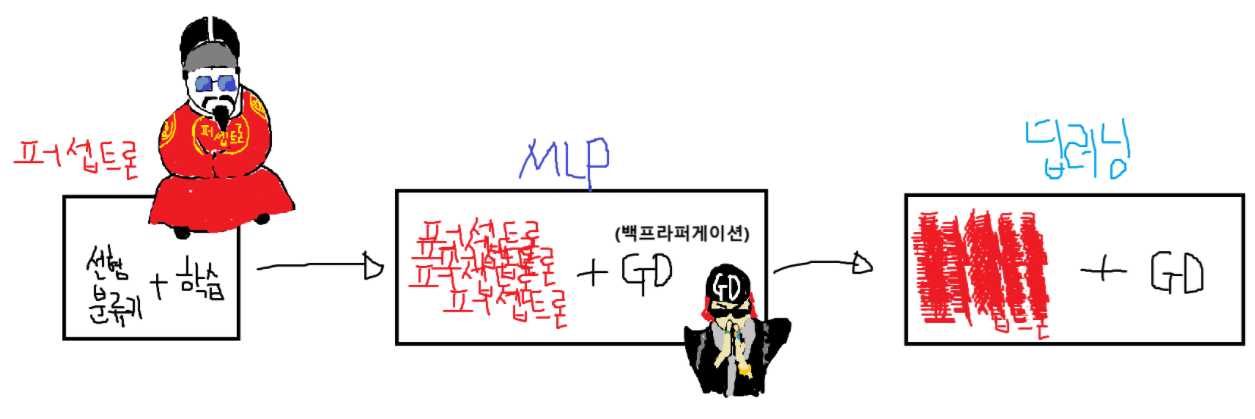

### 딥러닝
- 딥러닝이란?
  - 사람이 Feature를 선택해서 입력을 넣지 않고, 모델이 스스로 Feature를 정하고 학습하는 신경망 입니다.
  - 예시
    - 사진에서 사람 얼굴 테두리 선만 전처리해서 모델 입력으로 넣는 것이 아니라, 그냥 사진 통짜로 넣는 모델 (CNN)
    - 음성의 주파수만 추출해서 입력을 넣는 것이 아니라, 그냥 음성파일 통짜로 넣는 모델 (RNN)
  - 즉, 사람이 Feature를 설계하지 않아도, 모델이 스스로 Feature까지 찾아내는 학습을 "딥러닝" 이라고 부릅니다.
- 다음과 같은 특징을 갖습니다.
  - 깊은 Layer를 갖는 경우가 많습니다.
  - 데이터가 대량으로 필요한 경우가 많습니다.
  - 대규모 연산이 필요한 경우가 많습니다.
- 기준이 모호합니다.
  - 사람들이 부르는 칭호 같은거라 기준이 모호합니다.
    - 예시 : 저 사람은 탑스타야 (탑스타의 기준??)
  - 정확히 몇개 Layer부터 딥러닝입니까? : 정해진 Layer 수 없습니다.
  - Feature를 조금 주면 딥러닝이 아닙니까? : 딥러닝일수도 아닐수도 있습니다. 정해진바는 없습니다.
  - 그럼 제가 딥러닝이라고 하면 딥러닝입니까? : 특징을 자동으로 찾아내기만 하면 맞습니다.

# 10. MNIST 데이터 셋 소개
- MNIST : Modified National Institute of Standards and Technology database
  - 한글 번역 : 수정된 미국 국립표준기술원 데이터베이스
- 그냥 손글씨 숫자 이미지 자료입니다.
  - 글자당 28 x 28 픽셀
  - 0 ~ 9 숫자
  - 검은색 배경에 밝은 색 글씨

<br/>

- 데이터가 아니라 데이터 셋 입니다.
  - 데이터 셋 = 데이터 + 정답 값 (Label) 입니다.
  - MNIST 데이터 셋은, 손글씨 이미지랑, 어떤 숫자인지 정답이 함께 들어있습니다.

<br/>

- MNIST는 전설의 레전드 실습자료 입니다.
  - 제 느낌상.. MLP를 강의하면, 90% 확률로 MNIST를 하게 됩니다.
  - for문 배울 때 '별찍기' 문제와 같은 느낌이죠.

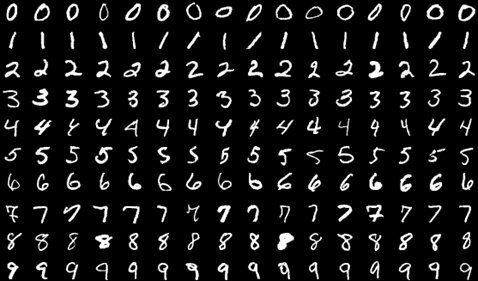

- 숫자 하나를 확대해보겠습니다.
  - 28 x 28 픽셀이니까 총 784 칸으로 구성된 이미지
  - 각 칸마다 명도값이 적혀있습니다. (0 ~ 255, 0 이면 검은색, 255는 흰색)

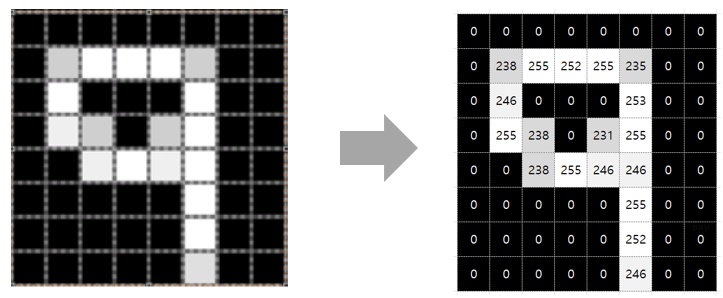

### 직접 데이터 셋 을 구경해봅시다.
- 따로 다운로드 안받아도 됩니다. 구글 코랩이 기본적으로 제공합니다.


- mnist_train_small.csv
  - 훈련용 데이터
  - 20,000 - 1 = 19,999개 레코드
  - 첫 컬럼은 정답이고, 나머지 784는 픽셀 값 입니다.
- mnist_test.csv
  - 모델 성능 평가용 데이터
  - 10,000 - 1 = 9,999개 레코드
- 코랩에서 왜 1개씩 뺐는지는 몰라요 ^^;

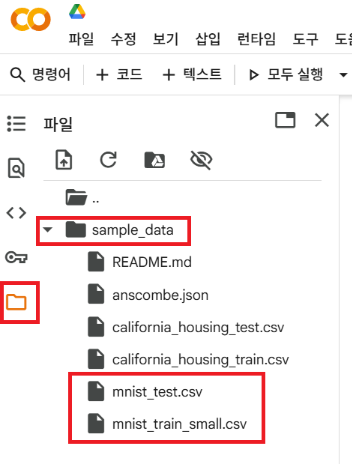

- 대부분 값이 0 이 적혀있을 텐데, 배경색이 값이 0(검은색) 이라 그렇습니다.

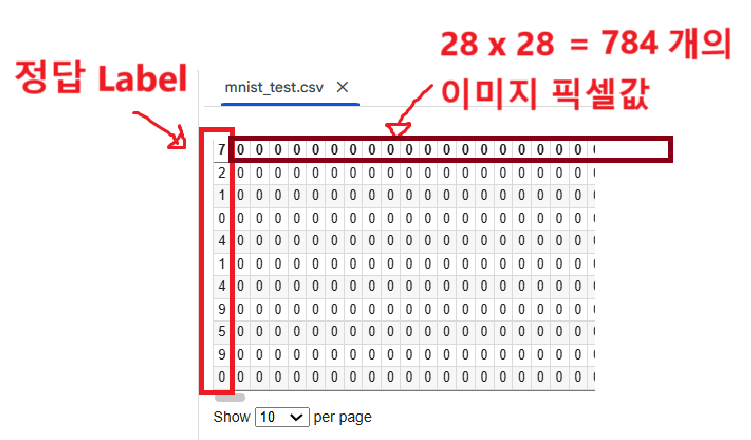

- 아래 이미지를 출력하는 코드는 다음과 같습니다.
  - Data Frame의 Series(Column) 별로 pytorch의 tensor로 변환합니다.
    - Label이 적혀있는 0번 Series ==>  1차원 텐서로 변환
    - 이미지가 적혀있는 1번 ~ 끝번 Series ==> 2차원 텐서로 변환
  - 이미지 3개만 출력해봅시다.

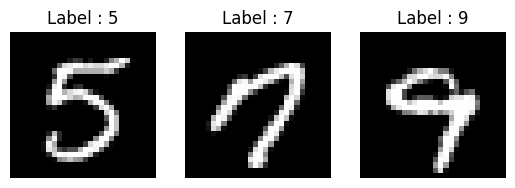

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

# MNIST train csv 로드 (19,999개)
# PyTorch 에는 csv 파일 읽는 기능이 없어서, Pandas를 사용했습니다.
test_df = pd.read_csv("sample_data/mnist_train_small.csv")

# 0번 Series(Column)에는 약 19,999개 Label이 있습니다.
labels = torch.tensor(test_df.iloc[:, 0].values) # 결과 : 1차원 텐서 (9,999)

# 1 ~ Last번 Series(Column)에는 약 19,999개 이미지값이 있습니다.
images = torch.tensor(test_df.iloc[:, 1:].values) # 결과 : 2차원 텐서 (9,999 x 784)

# 3개 이미지 출력
for i in range(3):
  # 784개 값을 [28 x 28] 행렬로 변환
  record = images[i].reshape(28, 28)

  plt.subplot(1, 3, i + 1)

  #imshow = image show, matplot의 이미지 출력 기능
  plt.imshow(record, cmap="gray")
  plt.title(f'Label : {labels[i].item()}')
  plt.axis("off")

#### MNIST 데이터 셋으로 뭘 할까요?
- 우리는 MNIST 데이터셋을 이용한 숫자 분류기를 만들어볼겁니다.
  - PyTorch의 Data Loader를 사용해볼겁니다.
  - 3 Layer로 구성된 MLP 모델을 만들겁니다.
- 이 실습을 위해 필요한 내용들을 하나씩 학습해보시죠.

# 11. PyTorch의 DataLoader 이해하기


- 딥러닝을 다룰 때 Data Loader는 앞으로 계속 쓰게 될것이니, 조금 자세히 이해를 하도록 하겠습니다.

- 데이터셋을 랜덤하게 섞어서 학습시키면 학습이 더 잘됩니다.
  - 예시
    - 고등어만 100 만 마리 학습시키면, 모델이 특징을 잘못 잡습니다.
    - 고등어랑 갈치랑 섞어가면서 학습시면, 모델이 비교하면서 특징을 더 잘잡습니다.
    - 역시 수학적 증명은 생략 ^^

<br/>

- 데이터를 랜덤하게 선택하는 것을 코딩하는 건, 어렵지 않지만 번거로운 일입니다.
  - 문제 : 1 ~ 30 번을 랜덤한 순서대로 하나씩 뽑아주세요. 같은 수를 뽑으면 안됩니다.
  - 구현 방법
    1. 1 ~ 30 까지 순차적으로 적은 List 준비
    2. 랜덤 값 2개 만들어서 SWAP 반복
    2. 만들어진 List 순서대로 값 하나씩 뽑기

In [54]:
import random

order = list(range(1, 31)) # [1, 2, 3, 4, .... , 29, 30]

# 랜덤한 위치 두 개를 골라 SWAP을 여러 번 수행
for _ in range(100):
    a = random.randint(0, 29)
    b = random.randint(0, 29)
    #swap
    order[a], order[b] = order[b], order[a]

# 결과 확인
for n in order:
    print(n, end = ' ')

1 19 20 22 5 6 17 29 7 28 2 27 26 16 14 10 8 13 21 12 15 11 30 25 23 9 24 3 4 18 

- DataLoader는 위 코드 보다 더 빠른 알고리즘으로 만들어져있습니다.
- DataLoader를 이용하면 랜덤한 순서대로 이미지를 하나씩 선정할 수 있습니다.
  - **DataLoader의 원래 목적은 엄청나게 거대한 데이터 전체를 한꺼번에 읽지 않고, 조금씩 읽어오는게 목적입니다.**
  - 또한 여러 CPU를 이용해서 여러 데이터를 한꺼번에 불러오는 기능도 있습니다.
- **우리 MNIST 실습에는 단순히 "랜덤한 이미지 지정"을 위해 사용할겁니다.**
  - 사실은.. csv 파일 자체에 랜덤한 순서로 이미지가 저장되어있어서, 큰 의미는 없긴해요.

  

### PyTorch의 DataLoader가 원하는 자료 형태
- DataLoader가 원하는 입력 형태가 있습니다.
- (입력데이터, Label) 형태로 된 Tuple들의 List 형태를 입력으로 주면 됩니다.

In [57]:
input = ["Franky","TigerStar", "J-Dragon","KKR"]
label = ["인호","범성", "자룡","기륜",]

print(list(zip(input, label)))

[('Franky', '인호'), ('TigerStar', '범성'), ('J-Dragon', '자룡'), ('KKR', '기륜')]


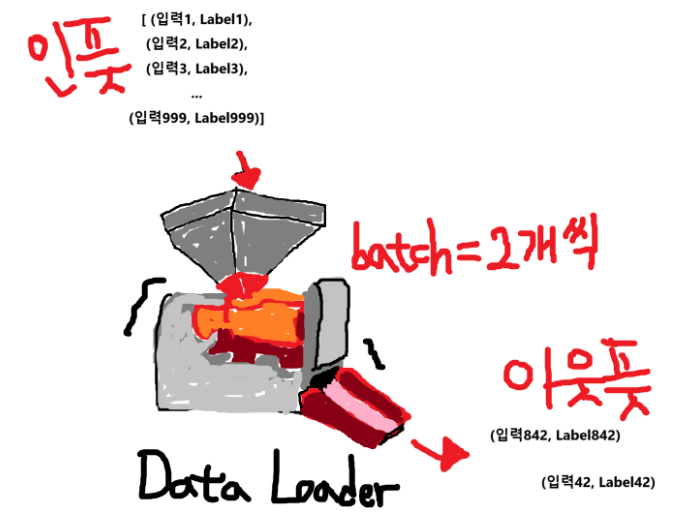

- batch 는 몇 개의 데이터 셋 뭉치를 몇개씩 모델에 입력할지, 모델의 입력 단위입니다.
  - 모델에 이미지 한 장씩 입력하고 싶으면 batch_size = 1 로 하면 됩니다.
  - 모델에 이미지 세 장씩 입력하고 싶으면 batch_size = 3 로 하면 됩니다.

In [58]:
import pandas as pd
import torch
from torch.utils.data import DataLoader

train_df = pd.read_csv("sample_data/mnist_train_small.csv")

# X = 픽셀(784), y = 정답 Label
images = torch.tensor(train_df.iloc[:, 1:].values, dtype=torch.float32)
labels = torch.tensor(train_df.iloc[:, 0].values, dtype=torch.long)

# Dataset 만들기 (입력, 정답 한 쌍씩)
train_dataset = list(zip(images, labels))

# batch는 모델에 입력할 데이터 개수입니다.
# [중요] batch_size를 바꾸어가면서 batch를 이해해주세요.
b_size = 3
train_loader = DataLoader(train_dataset, batch_size=b_size, shuffle=True) # 랜덤 = True

for X_batch, y_batch in train_loader:
  print(f'모델에 입력 데이터 크기 : {X_batch.shape}')
  print(f'모델 맞춰야하는 Label 결과 : {y_batch}')
  break




모델에 입력 데이터 크기 : torch.Size([3, 784])
모델 맞춰야하는 Label 결과 : tensor([1, 2, 8])


- batch 단위는 모델에 입력할 데이터 묶음의 개수입니다.
  - 수학적으로 y = wx + b 에서 x에 여러 이미지를 동시에 입력으로 넣을 수 있습니다.
    - 이미지 1장 : (1, 784) 행렬
    - 이미지 3장 : (3, 784) 행렬
  
  - 이때 각각 이미지에 해당하는 w, b 를 따로 사용하지 않고, 모든 이미지가 공통된 w, b 를 사용합니다.
    - 여기에 대한 수학식은 생략합니다. ^^
    - 이로 인해 연산량은 이미지 수 만큼 배로 더 들긴하지만.. 병렬처리 덕분에 성능 저하가 별로 없습니다.

# 12. MNIST 데이터 셋으로, 숫자분류기 코드 분석하기
- 거의 다 왔습니다. 마지막 Step 입니다.
- 숫자분류기 코드를 리뷰해보겠습니다.

In [59]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

#=============================================================
# 1. 데이터 준비 (csv -> data loader에 입력 해두기 까지)
#=============================================================
train_df = pd.read_csv("sample_data/mnist_train_small.csv")

# 전처리를 안하니까 가끔씩 학습 실패해서... / 255로 스케일링이 필요했습니다. (0 ~ 1 값으로 정규화)
X_train = torch.tensor(train_df.iloc[:, 1:].values, dtype=torch.float32) / 255.0
y_train = torch.tensor(train_df.iloc[:, 0].values, dtype=torch.long)

# Data Loader 세팅 완료
train_dataset = list(zip(X_train, y_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

#=============================================================
# 2. 모델 준비
#=============================================================
# Layer의 개수, 중간 Layer의 입력과 출력의 개수는 모두 하이퍼파라미터 입니다.
model = nn.Sequential(
    nn.Linear(784, 256), # 한 batch당 입력과 출력 개수를 적는 것을 잊지마세요.
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10) # 최종 출력값은 10개 입니다. '0' ~ '9' 의 점수 값이 나옵니다.
)

#=============================================================
# 3. Loss & Optimizer (Adam)
#=============================================================
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#=============================================================
# 4. 학습
#=============================================================
epochs = 5
for epoch in range(epochs):
    total_loss = 0
    for X_batch, y_batch in train_loader:

        outputs = model(X_batch) # 예측

        loss = loss_fn(outputs, y_batch) # loss 계산 (softmax도 함께 수행함)

        optimizer.zero_grad() # 미분 엔진 초기화
        loss.backward() # 미분 계산
        optimizer.step() # 파라미터 업데이트

        total_loss += loss.item() # Loss 누적

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

#=============================================================
# 5. 학습 완성된 파라미터들, 파일로 저장
#=============================================================
# 학습 결과로 찾아낸 파라미터 값들을 파일로 저장합니다.
# .pth 확장자로 저장합니다. (pth = pytorch 약어)
torch.save(model.state_dict(), "model.pth")


Epoch 1/5, Loss: 0.4714
Epoch 2/5, Loss: 0.1845
Epoch 3/5, Loss: 0.1239
Epoch 4/5, Loss: 0.0912
Epoch 5/5, Loss: 0.0685


- 저장된 파일은 '새로고침' 버튼을 눌러 확인할 수 있습니다.

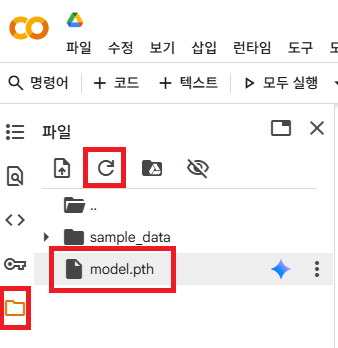

### 만들어진 모델, 불러와서 추론해보기
- 총 4,000시간이 걸려 학습을 했다고 가정합니다. ^^
- Application에서는 이 모델을 가져다, 추론용으로 사용하면 됩니다.
  - 아래 코드는 실행할 때마다 입력 데이터가 랜덤하게 선택되어, 결과가 달라져요.

입력 이미지


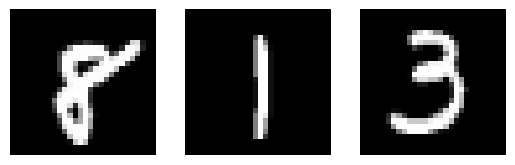


모델 추론 결과 : tensor([8, 1, 3])


In [63]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#=============================================================
# 1. 모델 구조 정의 (학습할 때랑 똑같아야 함)
#=============================================================
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

#=============================================================
# 2. 모델 불러오기
#=============================================================
model.load_state_dict(torch.load("model.pth"))  # 저장했던 파일 로드


#=============================================================
# 3. 테스트 데이터 준비
#=============================================================
test_df = pd.read_csv("sample_data/mnist_test.csv")

# 학습했던 것과 정규화 똑같이 해주기
X_test = torch.tensor(train_df.iloc[:, 1:].values, dtype=torch.float32) / 255.0
y_test = torch.tensor(test_df.iloc[:, 0].values, dtype=torch.long)

# DataLoader 준비 완료
test_dataset = list(zip(X_test, y_test))
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=True) # batch = 3 장씩

#=============================================================
# 4. 모델에 입력 데이터 이미지 3장 선택
#=============================================================
images = None
for X_batch, y_batch in test_loader:
  images = X_batch
  break

# 입력할 이미지 출력
print('입력 이미지')
for i in range(3):
    plt.subplot(1, 3, i+1)
    record = images[i].reshape(28, 28);
    plt.imshow(record, cmap="gray")
    plt.axis("off")
plt.show()
print()

#=============================================================
# 5. 추론하기!
#=============================================================
with torch.no_grad():
    outputs = model(images)
    preds = torch.argmax(outputs, dim=1) # 10개의 output 값중 가장 큰 값의 index 찾기
    print(f'모델 추론 결과 : {preds}')



### 주요 소스코드 1 : 모델 학습

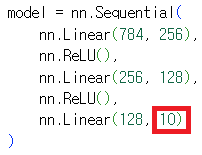

- 출력값을 보면 10 개의 Output이 있습니다.
- Output 값은 다음과 같습니다.
  - y0 : 이미지가 숫자 0 일것 같은 정도를 나타내는 점수
  - y1 : 이미지가 숫자 1 일것 같은 정도를 나타내는 점수
  - y2 : 이미지가 숫자 2 일것 같은 정도를 나타내는 점수
  - ...
  - y9 : 이미지가 숫자 9 일것 같은 정도를 나타내는 점수

- 이 점수의 범위는 정해진게 없습니다. 엄청 작거나 엄청 클수도 있습니다.
  - 수식의 출력 값이예요. 학습 시도중인 w, b 에 따라 값이 결정되죠.

### 주요 소스코드 2 : Loss 계산하기

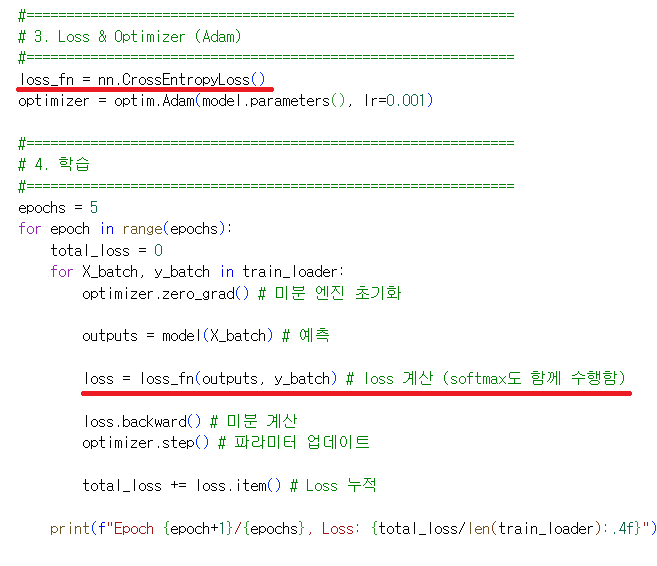

- 모델에서 출력 결과로 0 ~ 9 까지 점수를 획득했습니다.
  - loss = loss_fun(outputs, y_batch) 에서 outputs 변수에 10개의 점수가 들어있습니다.
- 각 점수를 비율에 맞게 확률로 변경합니다. (SoftMax라는 수식을 적용하면 계산할 수 있습니다.)
- 10개의 확률 값중 Max 확률 값을 찾아냅니다.
- 숫자 1에 대한 확률 값이 나왔으니, 오차를 계산할 수 있습니다.
  - 정답은 숫자 1 = 100%
  - 예측값은 숫자 1 = 89%
  - Cross Entropy 함수에 정답과 예측값을 집어넣으면, Loss 값을 계산할 수 있습니다. (수식은 생략)

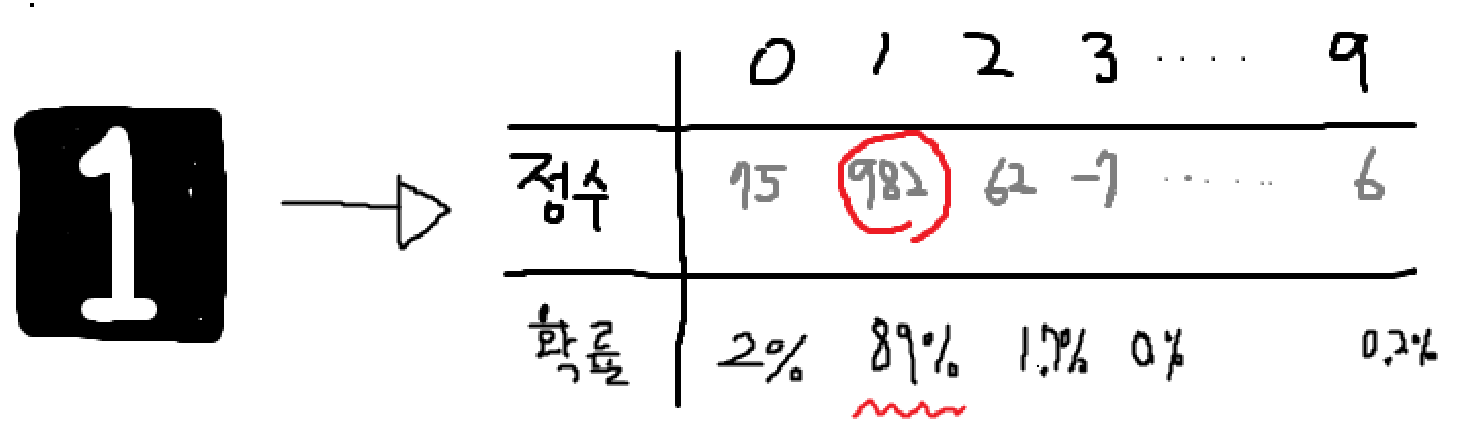

# 13. 끝으로
- 이번 챕터도 고생 많으셨습니다.
- 이번 시간에는 신경망에 대한 역사를 가볍게 살펴봤습니다.
  - 퍼셉트론, MLP, 신경망이 무엇인지 공부했습니다.
  - MLP로 MNIST 데이터셋을 이용한 숫자분류기 코드를 리뷰했습니다.

### Easy 자료 (강사님 자료)
- AI를 처음 공부하는 분들을 위해 만들어져있습니다.
- 내용을 모두 이해해야합니다! **강사님의 도움을 적극적으로 받아주세요.**

### 실습 / 과제 자료 (업스테이지 자료)
- AI를 공부해본 경험자 위주로 만들어져있습니다.
- 퍼즐조각을 모은다는 생각으로 공부해주세요!. **GPT의 도움을 적극적으로 받아주세요.**

### 교수님 강의
- 국내 최고의 AI 교수님들의 강의가 시작됩니다.
- 최대한 내용을 이해해봅시다.